# Medication

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [26]:
# Loading and preparing data
df = pd.read_csv('datasets/healthcare_dataset.csv')
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Year'] = df['Date of Admission'].dt.year
df['Length of Stay'] = (pd.to_datetime(df['Discharge Date']) - df['Date of Admission']).dt.days


## 1. Medication and Test Results Analysis - Clean Bar Chart Version

=== Medication and Test Results ===

Contingency Table:
Test Results  Abnormal  Inconclusive  Normal
Medication                                  
Aspirin           3732          3624    3738
Ibuprofen         3747          3645    3735
Lipitor           3707          3746    3687
Paracetamol       3737          3681    3653
Penicillin        3704          3660    3704

Chi-square test: χ²=3.73, p=0.8805


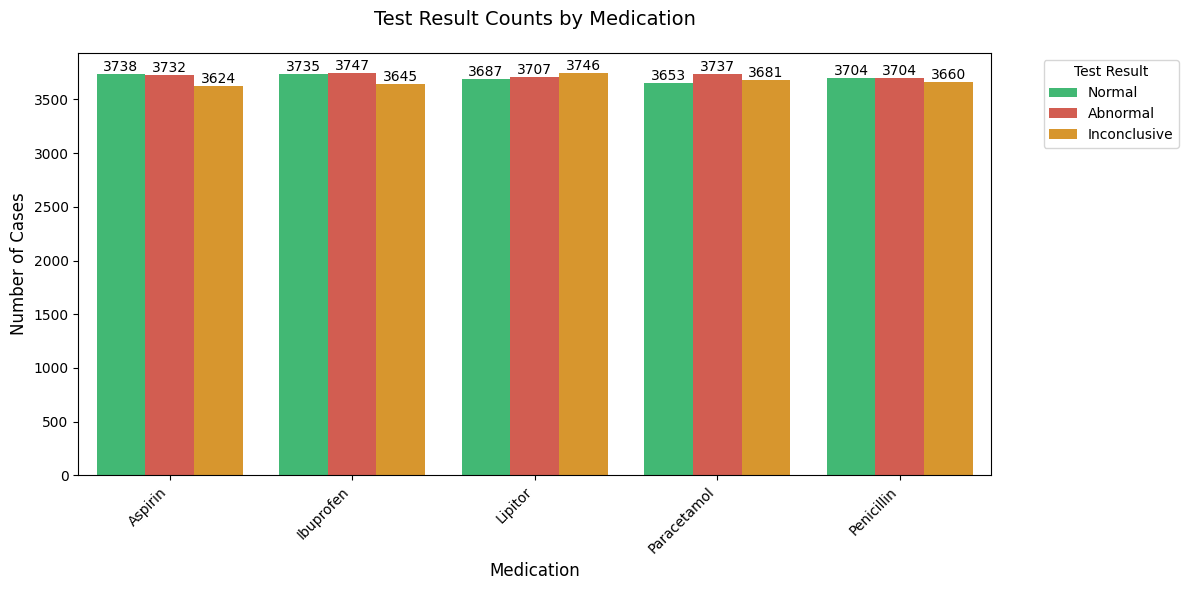

In [ ]:
print("=== Medication and Test Results ===")

# Creating the contingency table
test_med_table = pd.crosstab(df['Medication'], df['Test Results'])
print("\nContingency Table:")
print(test_med_table)

if test_med_table.empty:
    print("\nWarning: No data available for analysis")
else:
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(test_med_table)
    print(f"\nChi-square test: χ²={chi2:.2f}, p={p:.4f}")
    
    # Preparing the data for plotting
    plot_data = test_med_table.reset_index()
    plot_data = pd.melt(plot_data, id_vars=['Medication'], 
                        value_vars=['Normal', 'Abnormal', 'Inconclusive'],
                        var_name='Test Result', value_name='Count')
    
    # Creating the grouped bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(data=plot_data, 
                x='Medication', 
                y='Count', 
                hue='Test Result',
                palette={'Normal':'#2ecc71', 'Abnormal':'#e74c3c', 'Inconclusive':'#f39c12'})
    
    plt.title('Test Result Counts by Medication', fontsize=14, pad=20)
    plt.ylabel('Number of Cases', fontsize=12)
    plt.xlabel('Medication', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Adding the value labels on top of bars
    for p in plt.gca().patches:
        height = p.get_height()
        if height > 0:
            plt.gca().annotate(f'{int(height)}', 
                             (p.get_x() + p.get_width()/2., height),
                             ha='center', va='center', 
                             xytext=(0, 5), 
                             textcoords='offset points')
    
    # Adjusting legend
    plt.legend(title='Test Result', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

## 2. Medication and Billing Amount Analysis


=== Medication and Billing Amount ===

ANOVA test: F=1.14, p=0.3360


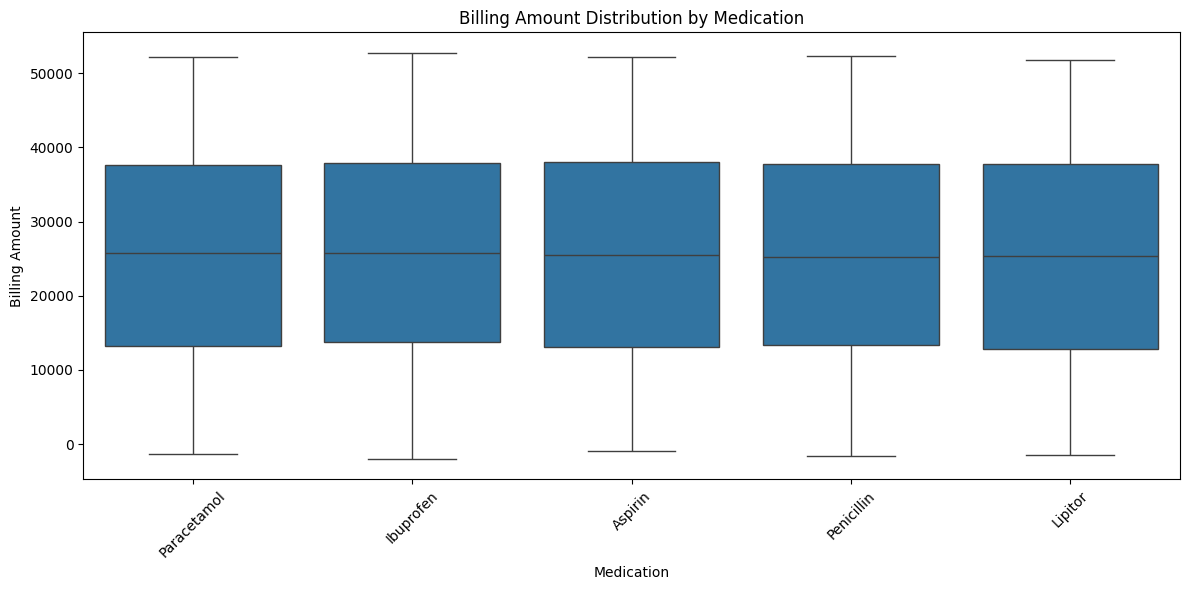

In [ ]:


print("\n=== Medication and Billing Amount ===")

# ANOVA test
med_groups = [group['Billing Amount'] for name, group in df.groupby('Medication')]
f_stat, p_value = f_oneway(*med_groups)
print(f"\nANOVA test: F={f_stat:.2f}, p={p_value:.4f}")

# Post-hoc Tukey test if ANOVA significant
if p_value < 0.05:
    print("\nPost-hoc Tukey HSD results:")
    tukey = pairwise_tukeyhsd(df['Billing Amount'], df['Medication'])
    print(tukey.summary())

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Medication', y='Billing Amount')
plt.title('Billing Amount Distribution by Medication')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. Medication Trends Per Year


=== Medication Trends Per Year ===

Yearly Medication Counts:
Medication  Aspirin  Ibuprofen  Lipitor  Paracetamol  Penicillin
Year                                                            
2019           1466       1409     1477         1473        1562
2020           2220       2227     2254         2310        2274
2021           2197       2225     2234         2199        2076
2022           2230       2209     2226         2208        2144
2023           2183       2278     2225         2118        2222
2024            798        779      724          763         790


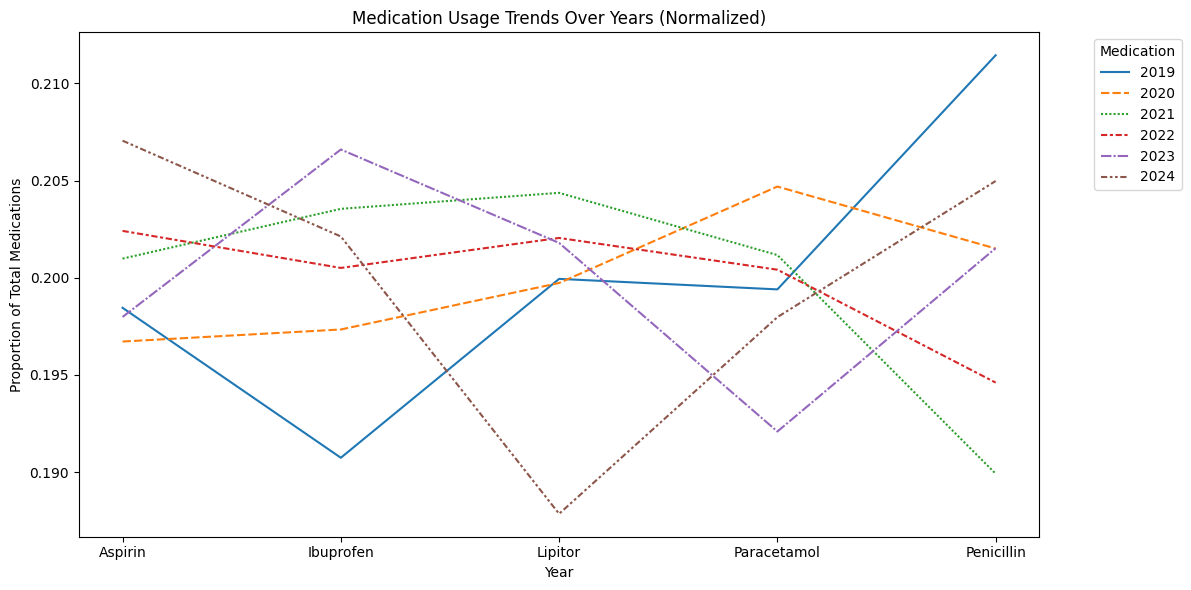

In [ ]:
print("\n=== Medication Trends Per Year ===")

# Yearly medication counts
yearly_meds = df.groupby(['Year', 'Medication']).size().unstack().fillna(0)
print("\nYearly Medication Counts:")
print(yearly_meds)

# Normalized trends
yearly_meds_norm = yearly_meds.div(yearly_meds.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_meds_norm.T)
plt.title('Medication Usage Trends Over Years (Normalized)')
plt.ylabel('Proportion of Total Medications')
plt.xlabel('Year')
plt.legend(title='Medication', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()



### Absolute counts visualization

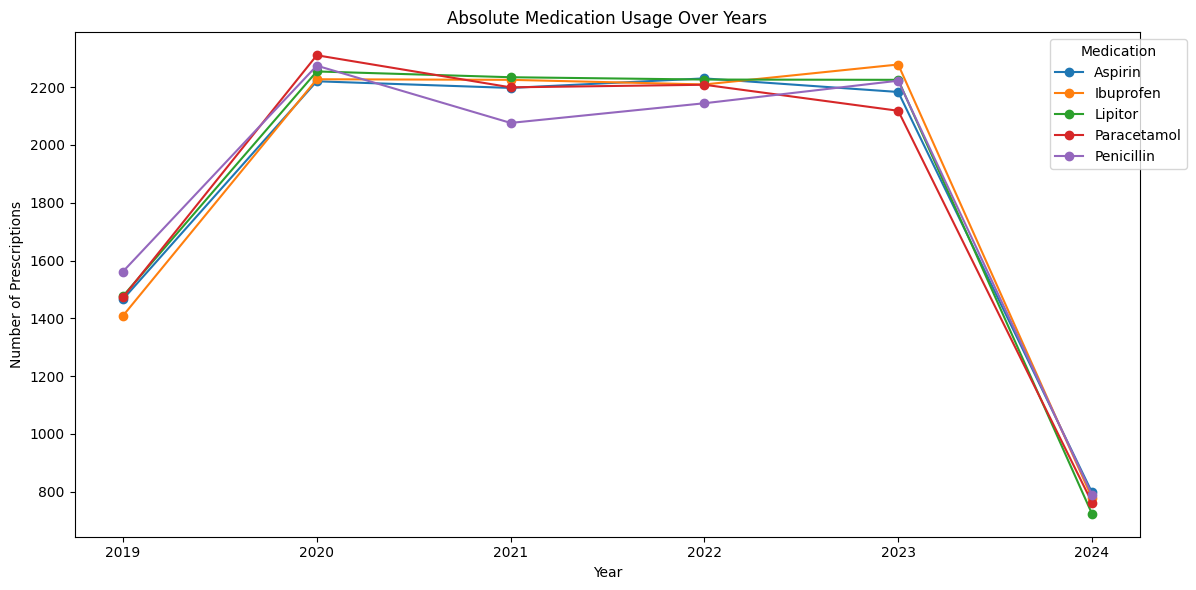

In [ ]:
plt.figure(figsize=(12, 6))
for med in yearly_meds.columns:
    plt.plot(yearly_meds.index, yearly_meds[med], label=med, marker='o')
plt.title('Absolute Medication Usage Over Years')
plt.ylabel('Number of Prescriptions')
plt.xlabel('Year')
plt.legend(title='Medication', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()